In [90]:
import math
import numpy as nm
import pandas as pd
import os

import matplotlib.pyplot as plt
import numpy as nm
import pylab

import matplotlib.pyplot
%config InlineBackend.figure_format = 'retina'
import numpy as np
from numpy.polynomial.polynomial import polyfit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
import scipy.stats as ss
from sklearn.metrics import mean_squared_error

In [77]:
path_to_hydrograph = "/Users/Dana/ParF/parflow/test/" # path to the location of the parflow hydrograph data
path_to_boundaryflow = "/Users/Dana/ParF/parflow/test/" # path to the location of the parflow outlet flow data
path_to_boundarydepth = "/Users/Dana/ParF/parflow/test/" # path to the location of the parflow outlet flow depth data

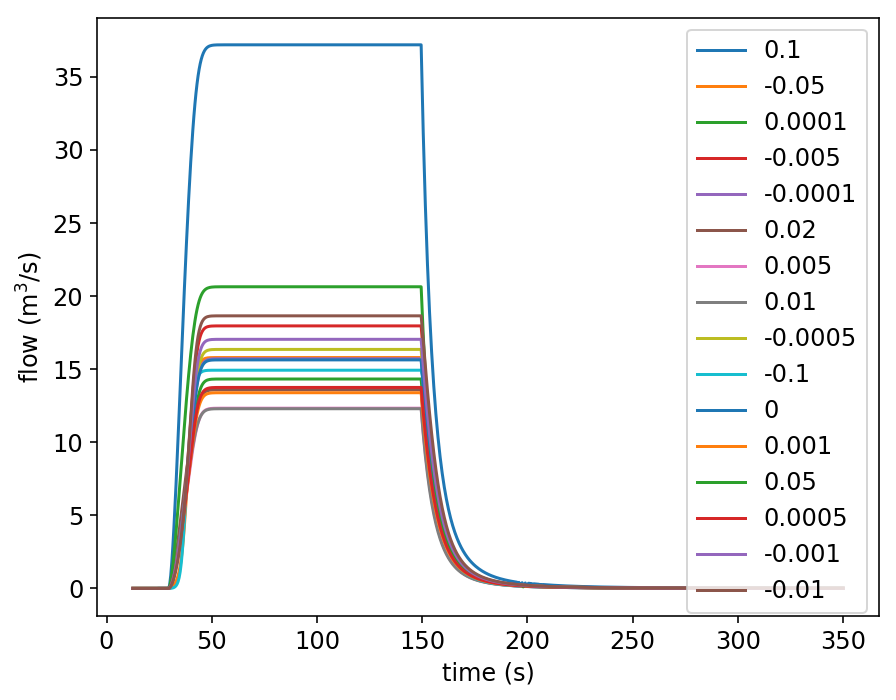

In [36]:
# this block plots each hydrograph at 0.5 resolution on a plot together

matplotlib.rcParams.update({'font.size': 12})
plt.figure(figsize = (7,5.5))


for file in os.listdir(path_to_hydrograph): # search in target location
    if file.endswith(".hydrograph.txt"): # for the hydrograph files
        #print(os.path.join(file))
        filename = path_to_hydrograph+str(file) # identifies the hydrograph files in the target location
        # uses the file name to find out the value of a
        if str(file)[0]=='n':
            m = 0
            n = 0
            for c in range(len(str(file))):
                if str(file)[c]=='_' and m==0:
                    m=c
                elif str(file)[c]=='_' and n==0:
                    n=c
            if str(file)[m+1:n]=='0':
                aval = '0'
            else:
                aval = '-'+(str(file)[m+1:n])
        else:
            m = 0
            for c in range(len(str(file))):
                if str(file)[c]=='_' and m==0:
                    m=c
            aval = (str(file)[:m])       
        #print(aval)
        
        # if a is 0, 0.02, or -0.02, then there are multiple hydrographs at different resolutions.
        # we will only plot the 0.5 resolution to match the rest of the hydrographs
        
        if aval=='0':
            if file.startswith("0_0.5res"):
                filer = pd.read_csv(filename, sep=' ')
                filer.index = pd.to_datetime(filer.index, unit='m')
                plt.plot(filer['index']/2,filer['sum']/12*15*2,label = aval)
        elif aval=='0.02':
            if file.startswith("0.02_0.5res"):
                filer = pd.read_csv(filename, sep=' ')
                filer.index = pd.to_datetime(filer.index, unit='m')
                plt.plot(filer['index']/2,filer['sum']*2,label = aval)
        elif aval=='-0.02':
            if file.startswith("0.02_0.5res"):
                filer = pd.read_csv(filename, sep=' ')
                filer.index = pd.to_datetime(filer.index, unit='m')
                plt.plot(filer['index']/2,filer['sum']*2,label = aval)
        else:
            filer = pd.read_csv(filename, sep=' ')
            filer.index = pd.to_datetime(filer.index, unit='m')
            plt.plot(filer['index']/2,filer['sum']*2,label = aval)

        
        
plt.legend(loc='upper right')
plt.xlabel('time (s)')
plt.ylabel('flow (m$^3$/s)')
plt.show()




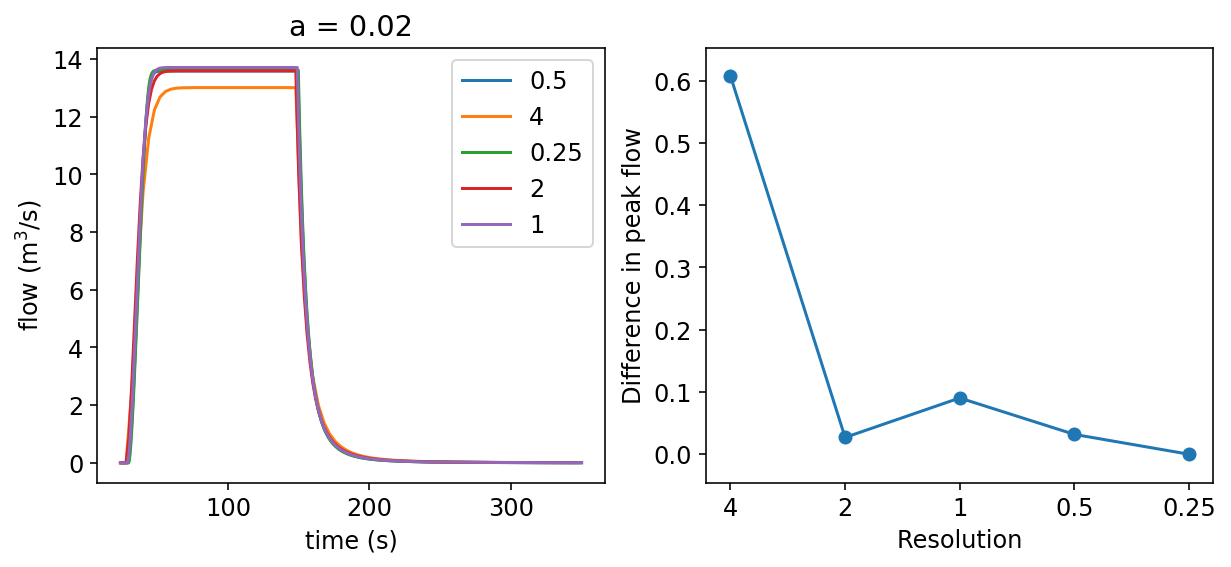

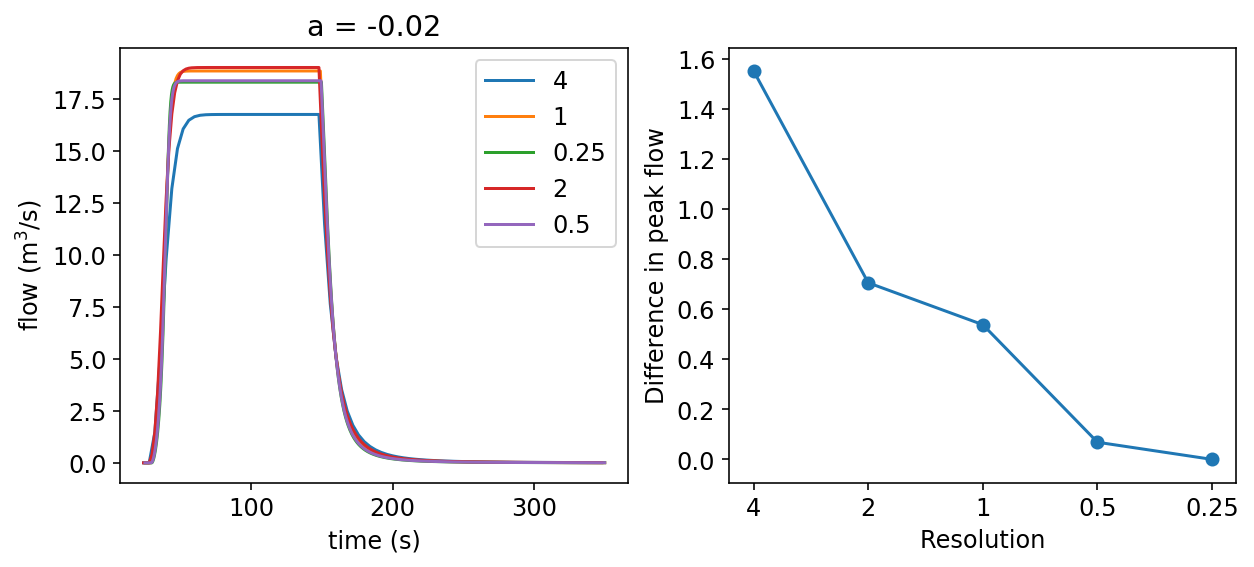

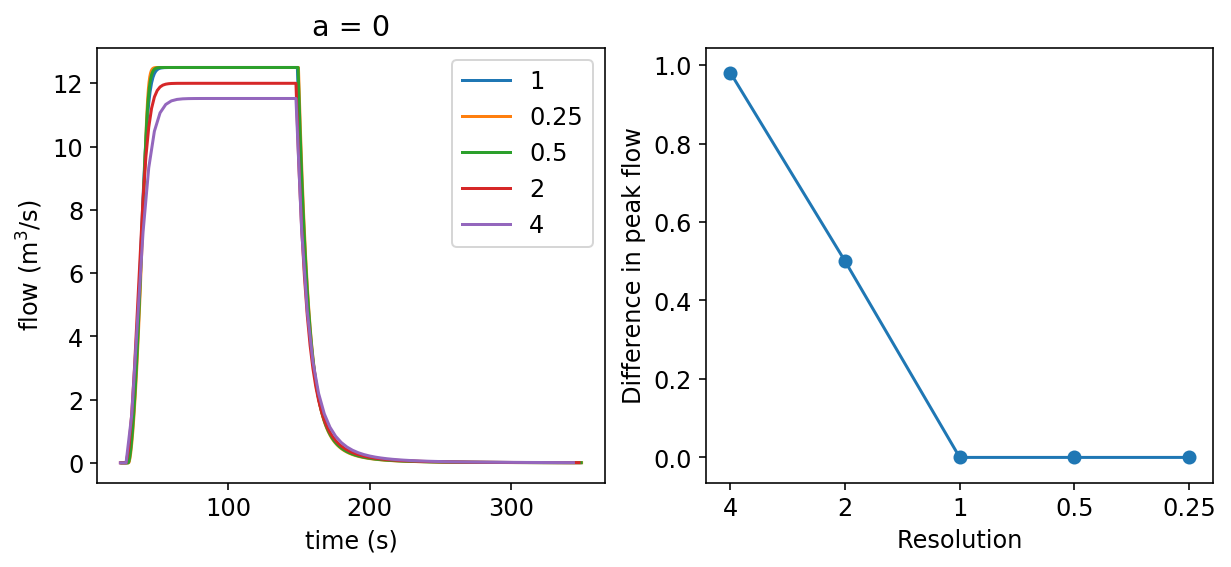

In [71]:
# this block plots the hydrographs of a = 0.02, a = -0.02, and a = 0 at different resolutions
# next to the difference in peak flow between each resolution and the highest resolution

# these dictionaries will hold the peak flow values for each resolution for each value of a
peak_neg_02 = {'4res':0,'2res':0,'1res':0,'0.5res':0,'0.25res':0}
peak_02 = {'4res':0,'2res':0,'1res':0,'0.5res':0,'0.25res':0}
peak_0 = {'4res':0,'2res':0,'1res':0,'0.5res':0,'0.25res':0}

# these lists will hold the differences between resolutions for the difference in peak flows plot
plotvals_neg02 = []
plotvals_02 = []
plotvals_0 = []

# this dictionry holds the names of various things for ease of access
aaa = {'negative_0.02':[-0.02, peak_neg_02,plotvals_neg02],'0':[0,peak_0,plotvals_0],
       '0.02':[0.02,peak_02,plotvals_02]}


# we will make one plot for each resolution (aa)
for aa in aaa.keys():
    plt.figure(figsize=(10, 4))
    for file in os.listdir(path_to_hydrograph): 
        
        plt.subplot(1, 2, 1)
        if file.endswith(".hydrograph.txt") and file.startswith(aa): # searches files for ones at the correct value of a
            #print(os.path.join(file))
            filename = path_to_hydrograph+str(file)
            aval =  aaa[aa][0] # sets value of a
            filer = pd.read_csv(filename, sep=' ') # reads in the file
            filer.index = pd.to_datetime(filer.index, unit='m') # sets the index on the file
            
            # plots boundary flow data as a percent of the boundary length and accounts for resolution in flow values
            if file.startswith(aa+"_4res"):
                plt.plot([filer['index'][i]*4 for i in range(len(filer))],[filer['sum'][i]/4. for i in range(len(filer))],
                          label = '4')
                aaa[aa][1]['4res'] = max(filer['sum'].tolist())/4.
            elif file.startswith(aa+"_2res"):
                plt.plot([filer['index'][i]*2 for i in range(len(filer))],[filer['sum'][i]/2. for i in range(len(filer))],
                          label = '2')
                aaa[aa][1]['2res'] = max(filer['sum'].tolist())/2.
            elif file.startswith(aa+"_1res"):
                plt.plot([filer['index'][i]*1 for i in range(len(filer))],[filer['sum'][i]/1. for i in range(len(filer))],
                          label = '1')
                aaa[aa][1]['1res'] = max(filer['sum'].tolist())/1.
            elif file.startswith("0_5slope"):
                plt.plot([filer['index'][i]*1 for i in range(len(filer))],[filer['sum'][i]/1. for i in range(len(filer))],
                          label = '1')
                aaa[aa][1]['1res'] = max(filer['sum'].tolist())/1.
            elif file.startswith(aa+"_0.5res"):
                plt.plot([filer['index'][i]*0.5 for i in range(len(filer))],[filer['sum'][i]/0.5 for i in range(len(filer))],
                          label = '0.5')
                aaa[aa][1]['0.5res'] = max(filer['sum'].tolist())*2.
            elif file.startswith(aa+"_0.25res"):
                plt.plot([filer['index'][i]*0.25 for i in range(len(filer))],[filer['sum'][i]/0.25 for i in range(len(filer))],
                          label = '0.25')
                aaa[aa][1]['0.25res'] = max(filer['sum'].tolist())*4.
    plt.legend()
    plt.title('a = '+str(aaa[aa][0]))
    plt.xlabel('time (s)')
    plt.ylabel('flow (m$^3$/s)')
    #plt.show()
    plt.subplot(1, 2, 2)

    # calculates the peak flow differences
    aaa[aa][2] = [abs(aaa[aa][1]['4res']-aaa[aa][1]['0.25res']), abs(aaa[aa][1]['2res']-aaa[aa][1]['0.25res']),
                abs(aaa[aa][1]['1res']-aaa[aa][1]['0.25res']), abs(aaa[aa][1]['0.5res']-aaa[aa][1]['0.25res']),0]
    # plots the peak flow differences
    plt.scatter([1,2,3,4,5],aaa[aa][2])
    plt.plot([1,2,3,4,5],aaa[aa][2])
    plt.xticks([1,2,3,4,5],['4','2','1','0.5','0.25'])
    plt.ylabel('Difference in peak flow')
    plt.xlabel('Resolution')
    plt.show()
    

Text(0.5,0,'Resolution')

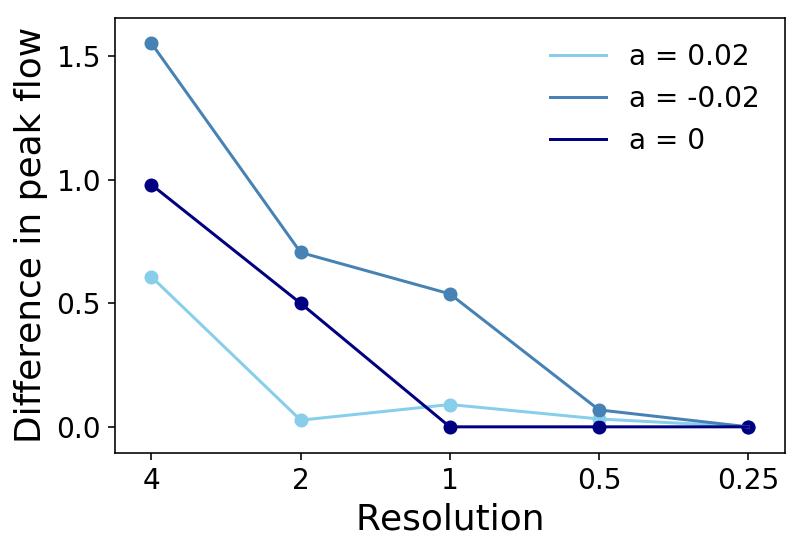

In [74]:
# this block plots all of the difference in peak flow lines together for each value of a

matplotlib.rcParams.update({'font.size': 14})

colors = ['skyblue','steelblue','navy']

j = 0
for aa in aaa.keys():
    plt.plot([1,2,3,4,5],aaa[aa][2],c=colors[j],label='a = '+str(aaa[aa][0]))
    plt.scatter([1,2,3,4,5],aaa[aa][2],c=colors[j])
    j += 1

plt.legend(frameon=False)
plt.xticks([1,2,3,4,5],['4','2','1','0.5','0.25'])
plt.ylabel('Difference in peak flow',fontsize = 18)
plt.xlabel('Resolution',fontsize = 18)


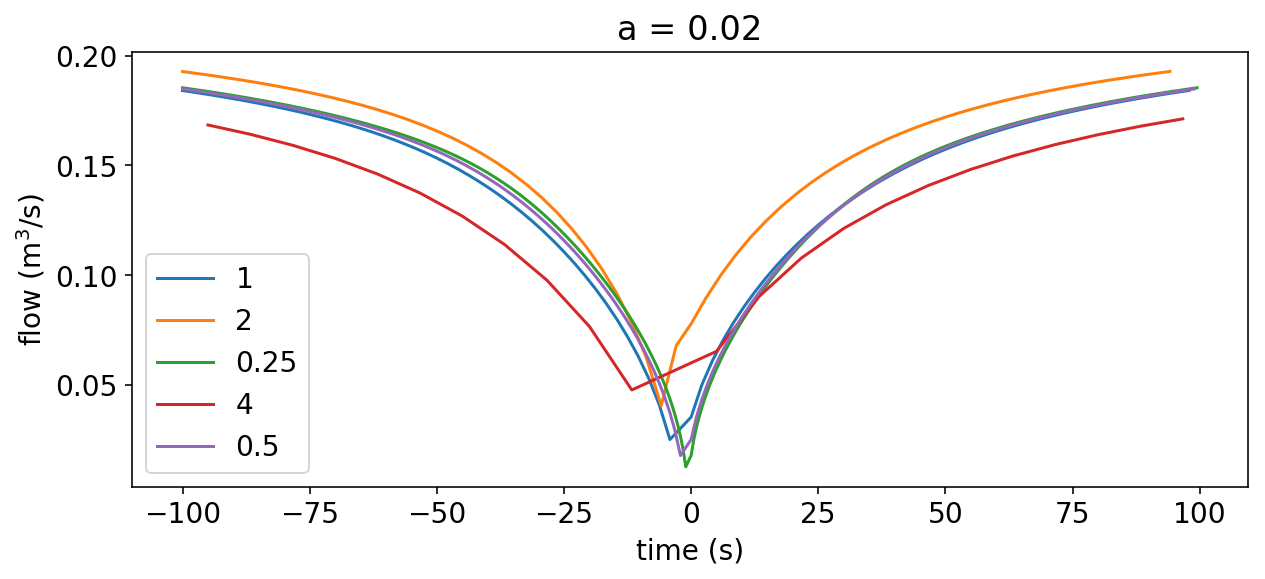

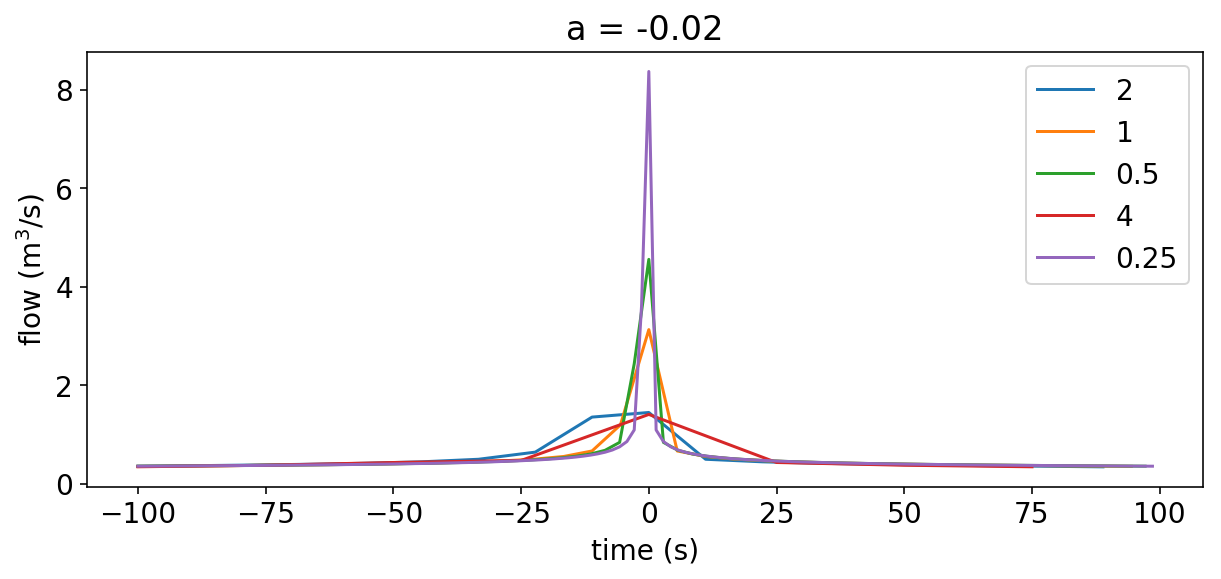

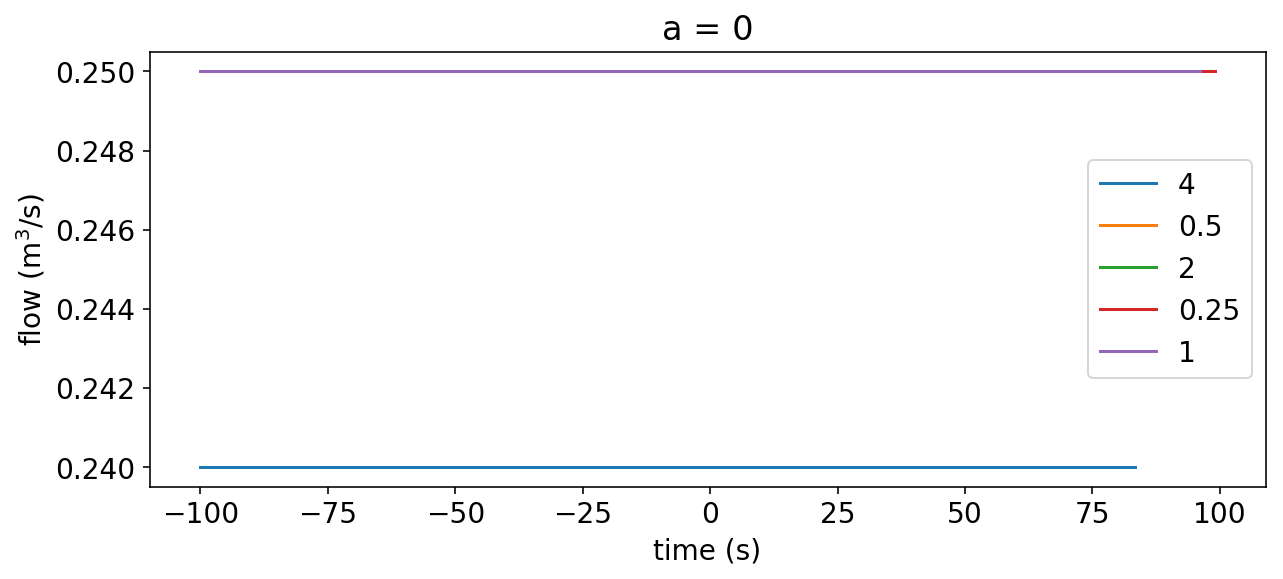

In [100]:
# this block plots the flow data at the boundary at different resolutions for a = 0, a = 0.02, and a = -0.02

# makes one plot for each value of a
for aa in aaa.keys():
    plt.figure(figsize=(10, 4))
    for file in os.listdir(path_to_boundaryflow):
        if file.endswith(".cv.0.001.txt") and file.startswith(aa): # searches for files with correct value of a
            #print(os.path.join(file))
            filename = path_to_boundaryflow+str(file)
            aval =  aaa[aa][0] # sets value of a
            filer = pd.read_csv(filename, sep=' ') # reads in file
            filer.index = pd.to_datetime(filer.index, unit='m') #sets index as position along the boundary
            maxwid = float(len(filer['index'].tolist()))/2. # finds the maximum width for normlizing by width
            
            # if a is divergent (a>0), then there is numerical error around the divergence (center of boundary)
            # we remove this error for easier viewing. It has no impact on any results.
            if aaa[aa][0]==0.02:
                maxfiler = max(filer['value'])
                j=0
                for i in range(len(filer)):
                    if filer['value'][i]==maxfiler:
                        j=i
                        
                plotind = filer['index'].tolist()[:j]+filer['index'].tolist()[j+1:]
                plotval = filer['value'].tolist()[:j]+filer['value'].tolist()[j+1:]
                
            else:
                plotind = filer['index'].tolist()
                plotval = filer['value'].tolist()
             
            # plots boundary flow as a percent along boundary
            if file.startswith(aa+"_4res"):
                if aaa[aa][0]==0.02:
                    plt.plot([plotind[i]/maxwid*100.+5 for i in range(len(plotind))],[plotval[i]/16. for i in range(len(plotind))],
                          label = '4')
                else:
                    plt.plot([plotind[i]/maxwid*100. for i in range(len(plotind))],[plotval[i]/16. for i in range(len(plotind))],
                          label = '4')
            elif file.startswith(aa+"_2res"):
                plt.plot([plotind[i]/maxwid*100. for i in range(len(plotind))],[plotval[i]/4. for i in range(len(plotind))],
                          label = '2')
            elif file.startswith(aa+"_1res"):
                plt.plot([plotind[i]*1./maxwid*100. for i in range(len(plotind))],[plotval[i]/1. for i in range(len(plotind))],
                          label = '1')
            elif file.startswith("0_5slope"):
                plt.plot([plotind[i]*1./maxwid*100. for i in range(len(plotind))],[plotval[i]/1. for i in range(len(plotind))],
                          label = '1')
            elif file.startswith(aa+"_0.5res"):
                plt.plot([plotind[i]/maxwid*100. for i in range(len(plotind))],[plotval[i]/0.25 for i in range(len(plotind))],
                          label = '0.5')
            elif file.startswith(aa+"_0.25res"):
                plt.plot([plotind[i]/maxwid*100. for i in range(len(plotind))],[plotval[i]*16 for i in range(len(plotind))],
                          label = '0.25')
    plt.legend()
    plt.title('a = '+str(aaa[aa][0]))
    plt.xlabel('time (s)')
    plt.ylabel('flow (m$^3$/s)')
    plt.show()

    


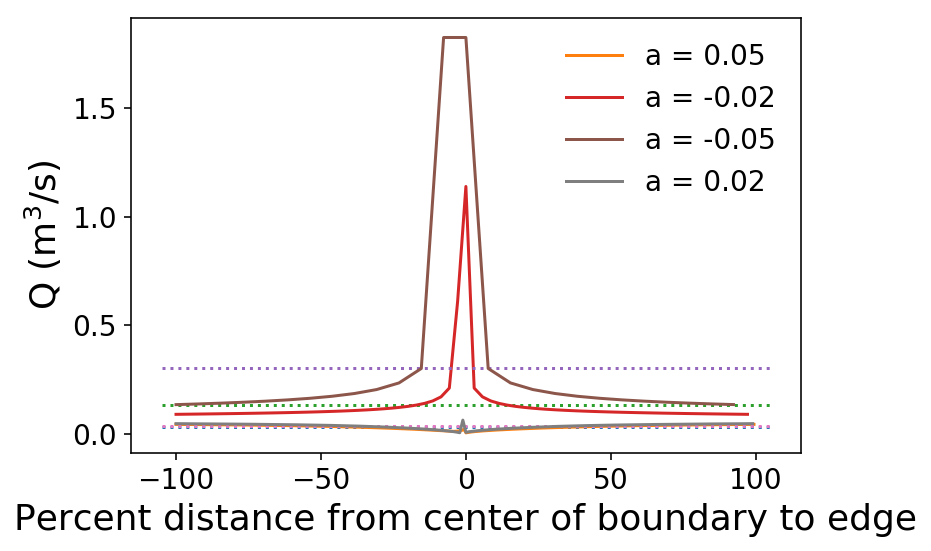

In [111]:
# this block plots the boundary flow for selected values of a

plota = [-0.05,-0.02,0.02,0.05] # user-selected values of a as floats

matplotlib.rcParams.update({'font.size': 14})

for file in os.listdir(path_to_boundaryflow):
    if file.endswith(".cv.0.001.txt"): # searches files in the folder where data are located
        filename = path_to_boundaryflow+str(file)
        
        # finds value of a by looking at file name
        if str(file)[0]=='n':
            m = 0
            n = 0
            for c in range(len(str(file))):
                if str(file)[c]=='_' and m==0:
                    m=c
                elif str(file)[c]=='_' and n==0:
                    n=c
            if str(file)[m+1:n]=='0':
                aval = '0'
            else:
                aval = '-'+(str(file)[m+1:n])
        else:
            m = 0
            for c in range(len(str(file))):
                if str(file)[c]=='_' and m==0:
                    m=c
            aval = (str(file)[:m])  
            
        # if the value of a is chosen to plot, then it is plotted
        if float(aval) in plota:
            filer = pd.read_csv(filename, sep=' ')
            
            # if a chosen value of a is 0, 0.02, or -0.02 then only the data for resolution 0.5 is plotted
            if file.startswith("0_") or file.startswith("0.02_") or file.startswith("negative_0.02"):
                if file.startswith("0_0.5res") or file.startswith("0.02_0.5res") or file.startswith("negative_0.02_0.5res"):
                    plotind = filer['index'].tolist()
                    plotvals = filer['value'].tolist()
                    plotwid = len(filer)/2
                    plt.plot([-105,105],[filer['value'].mean(),filer['value'].mean()],linestyle=':',label='_nolegend_')
                    plt.plot([plotind[i]/float(plotwid)*100. for i in range(len(plotind))],plotvals,label = 'a = '+aval)
            else:
                plotvals = filer['value'].tolist()
                plotind = filer['index'].tolist()
                plotwid = len(filer)/2
                plt.plot([-105,105],[filer['value'].mean(),filer['value'].mean()],linestyle=':',label='_nolegend_')
                plt.plot([plotind[i]/float(plotwid)*100. for i in range(len(plotind))],plotvals,label = 'a = '+aval)




plt.legend(frameon=False)
plt.ylabel('Q (m$^3$/s)',fontsize = 18)
plt.xlabel('Percent distance from center of boundary to edge',fontsize = 18)
plt.show()


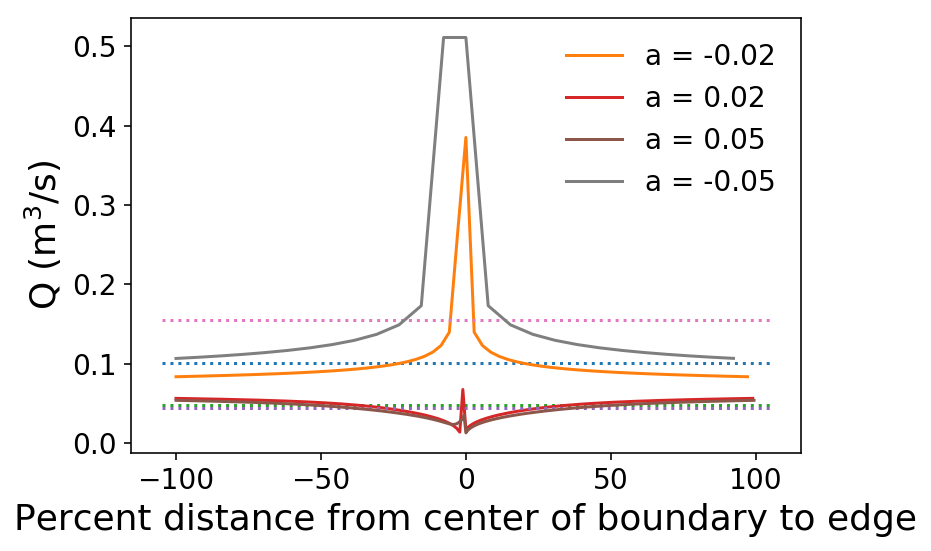

In [112]:
# this block plots the boundary flow depth for selected values of a

plota = [-0.05,-0.02,0.02,0.05] # user-selected values of a as floats

matplotlib.rcParams.update({'font.size': 14})

for file in os.listdir(path_to_boundarydepth):
    if file.endswith(".depth.0.001.txt"): # searches files in the folder where data are located
        filename = path_to_boundarydepth+str(file)
        
        # finds value of a by looking at file name
        if str(file)[0]=='n':
            m = 0
            n = 0
            for c in range(len(str(file))):
                if str(file)[c]=='_' and m==0:
                    m=c
                elif str(file)[c]=='_' and n==0:
                    n=c
            if str(file)[m+1:n]=='0':
                aval = '0'
            else:
                aval = '-'+(str(file)[m+1:n])
        else:
            m = 0
            for c in range(len(str(file))):
                if str(file)[c]=='_' and m==0:
                    m=c
            aval = (str(file)[:m])  
            
        # if the value of a is chosen to plot, then it is plotted
        if float(aval) in plota:
            filer = pd.read_csv(filename, sep=' ')
            
            # if a chosen value of a is 0, 0.02, or -0.02 then only the data for resolution 0.5 is plotted
            if file.startswith("0_") or file.startswith("0.02_") or file.startswith("negative_0.02"):
                if file.startswith("0_0.5res") or file.startswith("0.02_0.5res") or file.startswith("negative_0.02_0.5res"):
                    plotind = filer['index'].tolist()
                    plotvals = filer['value'].tolist()
                    plotwid = len(filer)/2
                    plt.plot([-105,105],[filer['value'].mean(),filer['value'].mean()],linestyle=':',label='_nolegend_')
                    plt.plot([plotind[i]/float(plotwid)*100. for i in range(len(plotind))],plotvals,label = 'a = '+aval)
            else:
                plotvals = filer['value'].tolist()
                plotind = filer['index'].tolist()
                plotwid = len(filer)/2
                plt.plot([-105,105],[filer['value'].mean(),filer['value'].mean()],linestyle=':',label='_nolegend_')
                plt.plot([plotind[i]/float(plotwid)*100. for i in range(len(plotind))],plotvals,label = 'a = '+aval)




plt.legend(frameon=False)
plt.ylabel('Q (m$^3$/s)',fontsize = 18)
plt.xlabel('Percent distance from center of boundary to edge',fontsize = 18)
plt.show()
